<a href="https://colab.research.google.com/github/lcphy/Stock-Forecast/blob/master/AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import datetime
from datetime import datetime
from sklearn import metrics
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.losses import mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
!pip install scipy==1.2.1

In [0]:
!pip install pmdarima

In [0]:
#TOMORROW

In [0]:
days=1

In [0]:
from pandas_datareader import data as wb
apple_training_complete = wb.DataReader('AAPL', data_source='yahoo', start='2015-1-1')
apple_training_complete.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,101.138702
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,98.289474
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,98.298729
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.677094
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,103.506897


In [0]:
from pmdarima import auto_arima
df_arima = apple_training_complete['Open'].copy()

modela = auto_arima(df_arima, trace=True, error_action='ignore', suppress_warnings=True, disp=0)
modela.fit(df_arima)

domani = modela.predict(n_periods=days)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5134.569, BIC=5164.663, Fit time=1.674 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5151.661, BIC=5161.693, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5144.507, BIC=5159.554, Fit time=0.119 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5145.030, BIC=5160.078, Fit time=0.159 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5147.637, BIC=5172.715, Fit time=0.908 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5147.726, BIC=5172.804, Fit time=0.578 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=5139.887, BIC=5174.997, Fit time=2.092 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5145.951, BIC=5166.014, Fit time=0.351 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 

In [0]:
apple_train = apple_training_complete['Open'].copy()
  
features_set = []  
labels = []  
for i in range(63, (apple_train.shape[0])):  
    features_set.append(apple_train[i-63:i])
    labels.append(apple_train[i])
    
features_set, labels = np.array(features_set), np.array(labels)  

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(features_set.shape[1], 1)))  
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=False, activation='relu'))  
model.add(Dropout(0.2))
  
#model.add(LSTM(units=50, return_sequences=True))  
#model.add(Dropout(0.2))

#model.add(LSTM(units=50))  
#model.add(Dropout(0.2))  
model.add(Dense(units = 1, activation='linear'))  
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')  
model.fit(features_set, labels, epochs = 100, batch_size = 32, verbose=0)  

for k in range(0,days+1,1):
  
  test_inputs = apple_train.iloc[-63:].values  
  
  test_inputs = test_inputs.reshape(-1,1)
  
  test_features = []  

  for i in range(63, 64):  
    
    test_features.append(test_inputs[i-63:i])
  
  test_features = np.array(test_features)  
  
  test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  
  
  predictions = model.predict(test_features)  
  
  apple_train.append(pd.Series([predictions]))
  
tomorrow = apple_train.iloc[-days:]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


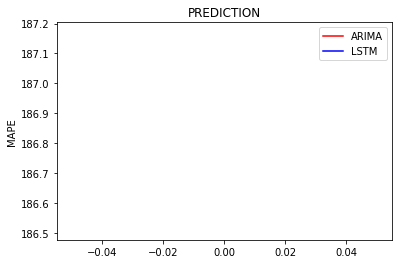

None

In [0]:
plt.clf() 
plt.title('PREDICTION') 
plt.plot(domani, color = 'red',label='ARIMA') 
plt.plot(tomorrow.values, color = 'blue',label='LSTM') 
#plt.plot(apple_testing['Open'].values, color = 'green',label='TRUE') 
plt.ylabel('MAPE') 
plt.legend() 
display(plt.show()) 

In [0]:
domani, tomorrow.values #, apple_testing['Open'].values

(array([187.17101421]), array([186.50999451]))